<a href="https://colab.research.google.com/github/BAHAMLAOUHI/Clustering-Approach-to-High-Dimensional-Data/blob/main/Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this notebook, we explore and compare various clustering algorithms to analyze our dataset and predict labels.

Our goal is to experiment with different clustering methods, including both classical and advanced techniques, to identify the most suitable approach for generating meaningful labels for our dataset. The methods covered include:

*  **K-Means:** A fast and popular partition-based clustering algorithm.

*  **Fuzzy C-Means:** A soft clustering technique allowing data points to belong to multiple clusters with varying degrees of membership.
*  **Spectral Clustering:** A graph-based approach that leverages eigenvalues for clustering non-linear data structures.
*  **K-Medoids:** A robust alternative to K-Means that is less sensitive to outliers and noise.

By applying these methods, we aim to gain insights into the clustering tendencies of our data and evaluate the performance of these algorithms in generating clusters that align with the underlying structure of the dataset.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('client_normalized.csv')

In [3]:
df.head()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
0,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.672841,-0.663455,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553
1,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.622021,-0.606671,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553
2,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.450257,-0.417779,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460
3,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.233078,-0.187503,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460
4,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,-0.347609,-0.348784,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29932 entries, 0 to 29931
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Limit_BAL       29932 non-null  float64
 1   Sex             29932 non-null  float64
 2   Education       29932 non-null  float64
 3   Marital_status  29932 non-null  float64
 4   Age             29932 non-null  float64
 5   Pay_0           29932 non-null  float64
 6   Pay_1           29932 non-null  float64
 7   Pay_2           29932 non-null  float64
 8   Pay_3           29932 non-null  float64
 9   Pay_4           29932 non-null  float64
 10  Pay_5           29932 non-null  float64
 11  Bill_AMT1       29932 non-null  float64
 12  Bill_AMT2       29932 non-null  float64
 13  Bill_AMT3       29932 non-null  float64
 14  Bill_AMT4       29932 non-null  float64
 15  Bill_AMT5       29932 non-null  float64
 16  Bill_AMT6       29932 non-null  float64
 17  Pay_AMT1        29932 non-null 

# K_means

In [5]:
df_Kmeans=df.copy()

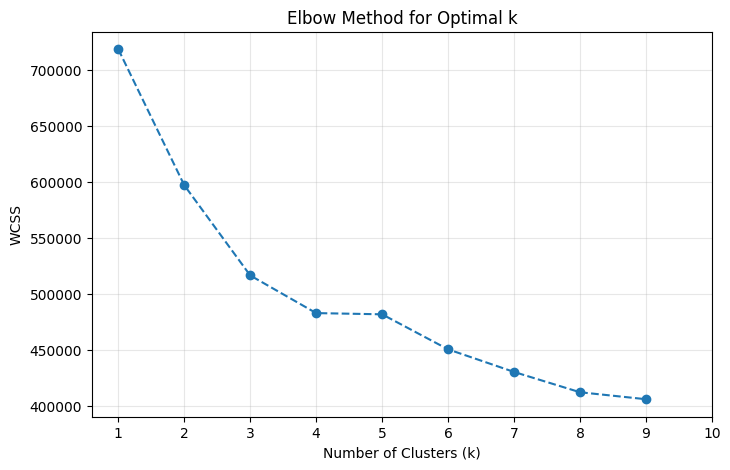

In [6]:
from sklearn.cluster import KMeans
wcss = []
# Test k values from 1 to 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_Kmeans)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(alpha=0.3)
plt.show()

In [7]:

optimal_k = 5

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df_Kmeans)

# Add the cluster labels to the DataFrame
df_Kmeans['Cluster'] = clusters


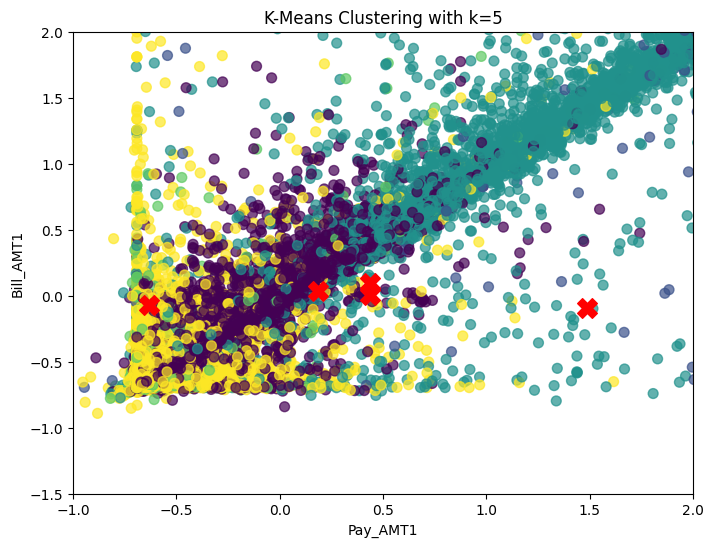

In [8]:
# Visualize the Clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df_Kmeans['Bill_AMT2'], df_Kmeans['Bill_AMT1'], c=df_Kmeans['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Pay_AMT1')
plt.ylabel('Bill_AMT1')
plt.xlim(-1,2)
plt.ylim(-1.5,2)
plt.show()

In [9]:
df_Kmeans['Cluster'].value_counts()

,count
Cluster,
0,12875
4,8946
2,4977
3,1976
1,1158


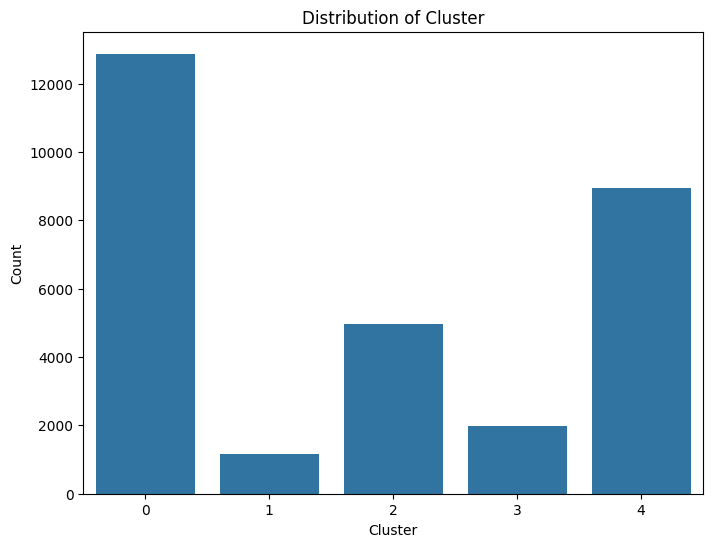

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df_Kmeans)
plt.title('Distribution of Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

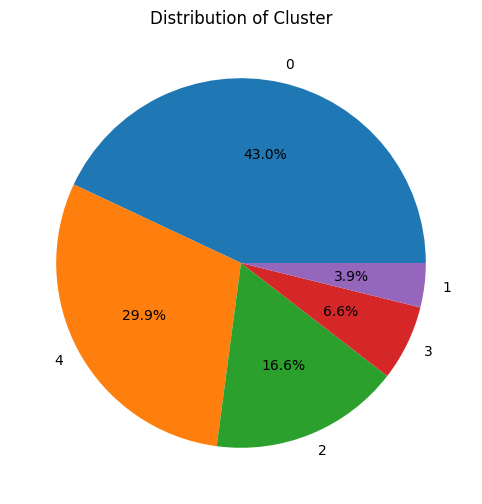

In [11]:
plt.figure(figsize=(8, 6))
df_Kmeans['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cluster')
plt.ylabel('')
plt.show()

# Fuzzy C_means

In [12]:
df_Cmeans=df.copy()

In [13]:
df_Cmeans.head(5)

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT4,Bill_AMT5,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y
0,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.672841,-0.663455,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553
1,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.622021,-0.606671,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553
2,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.450257,-0.417779,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460
3,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.233078,-0.187503,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460
4,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,-0.347609,-0.348784,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460


In [14]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [15]:
import skfuzzy as fuzz


In [16]:
# Number of clusters and fuzziness parameter
k = 5  # Number of clusters
m = 1.1  # Fuzziness parameter

# Perform Fuzzy C-Means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_Cmeans.T, k, m, error=0.005, maxiter=1000)

# The membership matrix u gives the fuzzy membership of each data point to each cluster
# u[i][j] is the degree of membership of point i to cluster j

# Print the fuzzy membership matrix
print("Fuzzy Membership Matrix:")
print(u)

Fuzzy Membership Matrix:
[[7.90374329e-01 8.42524025e-01 9.99999986e-01 ... 9.63497143e-03
  5.06061081e-01 9.95191704e-01]
 [8.20473454e-04 1.54402033e-04 8.58960040e-11 ... 1.13023926e-04
  3.00898545e-01 4.60855715e-04]
 [8.29351032e-03 1.56533750e-01 1.28777870e-10 ... 9.90217916e-01
  7.24931088e-02 3.51593147e-03]
 [1.66627184e-08 5.97463561e-10 3.88224579e-18 ... 7.40254021e-09
  1.62757720e-04 1.61015036e-10]
 [2.00511670e-01 7.87822777e-04 1.40698920e-08 ... 3.40811180e-05
  1.20384507e-01 8.31508954e-04]]


In [17]:
u.shape

(5, 29932)

In [18]:
labels = np.argmax(u, axis=0)

In [19]:
labels

array([0, 0, 0, ..., 2, 0, 0])

In [20]:
df_Cmeans['Clusters'] = labels

In [21]:
df_Cmeans['Clusters'].value_counts()

,count
Clusters,
0,11983
4,9073
1,4491
2,3201
3,1184


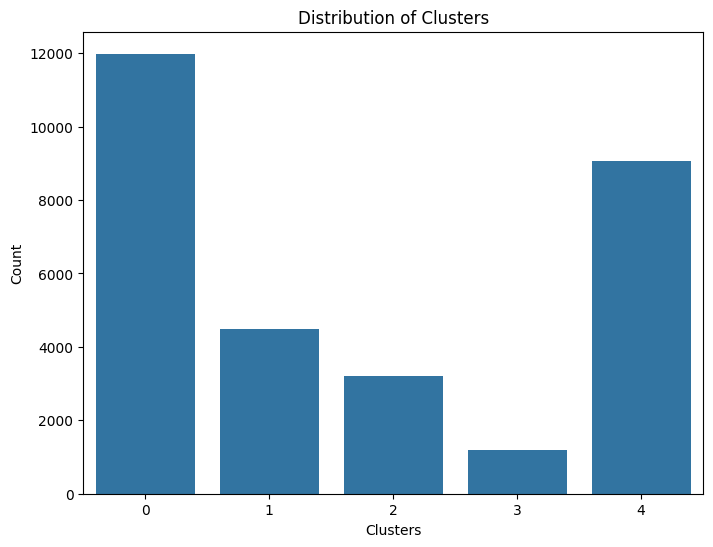

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Clusters', data=df_Cmeans)
plt.title('Distribution of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

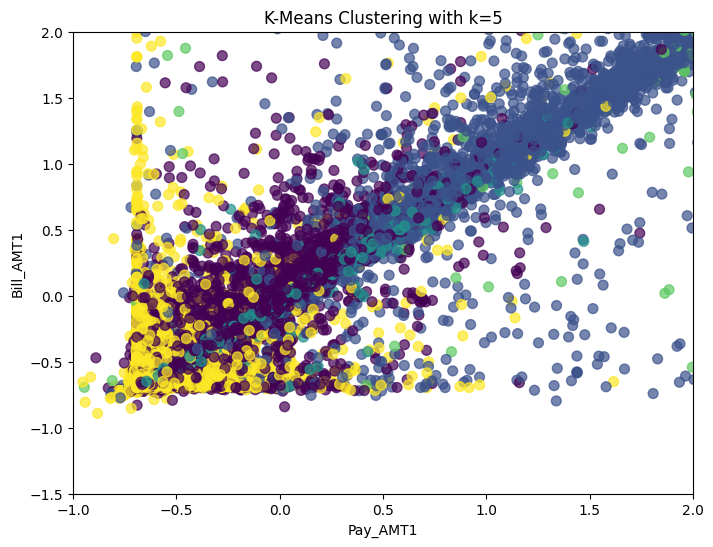

In [23]:
# Visualize the Clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df_Cmeans['Bill_AMT2'], df_Cmeans['Bill_AMT1'], c=df_Cmeans['Clusters'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.xlabel('Pay_AMT1')
plt.ylabel('Bill_AMT1')
plt.xlim(-1,2)
plt.ylim(-1.5,2)
plt.show()

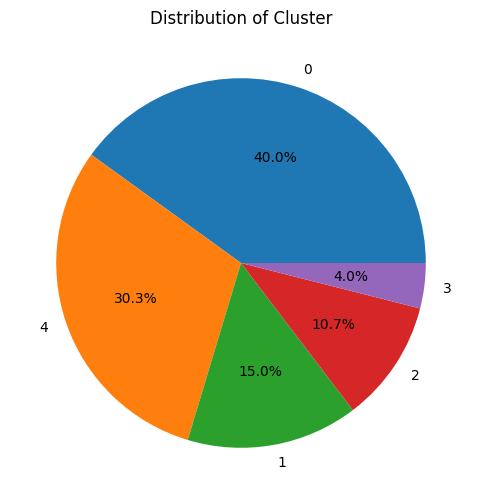

In [28]:
plt.figure(figsize=(8, 6))
df_Cmeans['Clusters'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cluster')
plt.ylabel('')
plt.show()

In [25]:

# Merge the dataframes based on their index
df = pd.merge(df, df_Kmeans[['Cluster']], left_index=True, right_index=True)
df = pd.merge(df, df_Cmeans[['Clusters']], left_index=True, right_index=True)

In [26]:
df.head()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y,Cluster,Clusters
0,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553,3,0
1,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553,0,0
2,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460,0,0
3,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460,0,0
4,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460,0,0


In [27]:
df.to_csv('client_clusters.csv', index=False)

# Spectral Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('client_clusters.csv')

In [3]:
df.head()

,Limit_BAL,Sex,Education,Marital_status,Age,Pay_0,Pay_1,Pay_2,Pay_3,Pay_4,...,Bill_AMT6,Pay_AMT1,Pay_AMT2,Pay_AMT3,Pay_AMT4,Pay_AMT5,Pay_AMT6,Y,Cluster,Clusters
0,-1.136377,0.810441,0.187091,-1.070083,-1.245239,1.794683,1.782197,-0.697299,-0.667250,-1.530779,...,-0.653139,-0.341854,-0.226997,-0.296596,-0.308036,-0.314197,-0.293448,1.874553,3,0
1,-0.366074,0.810441,0.187091,0.859419,-1.028293,-0.875707,1.782197,0.138566,0.188307,0.234386,...,-0.598425,-0.341854,-0.213510,-0.239844,-0.244263,-0.314197,-0.181057,1.874553,0,0
2,-0.597165,0.810441,0.187091,0.859419,-0.160510,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.392251,-0.250163,-0.191827,-0.239844,-0.244263,-0.248811,-0.012470,-0.533460,0,0
3,-0.905286,0.810441,0.187091,-1.070083,0.164909,0.014423,0.111311,0.138566,0.188307,0.234386,...,-0.157386,-0.221049,-0.169321,-0.228493,-0.237885,-0.244299,-0.237253,-0.533460,0,0
4,-0.905286,-1.233897,0.187091,-1.070083,2.334368,-0.875707,0.111311,-0.697299,0.188307,0.234386,...,-0.332151,-0.221049,1.333814,0.270926,0.265922,-0.269146,-0.255291,-0.533460,0,0


In [4]:
X=df.drop(['Cluster','Clusters'],axis=1)

In [5]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(
    n_clusters=5,
    affinity='nearest_neighbors',
    assign_labels='kmeans',
    random_state=42
)
labels = spectral.fit_predict(X)

In [8]:
print(labels)

[4 4 0 ... 4 1 4]


In [9]:
df["Spectral_Cluster"]=labels

In [10]:
df["Spectral_Cluster"].value_counts()

,count
Spectral_Cluster,
1,10336
0,6911
4,6897
3,5757
2,31


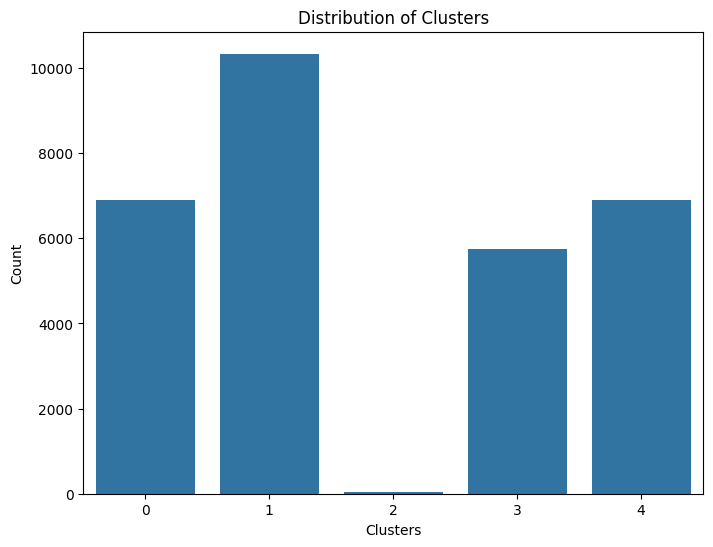

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Spectral_Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

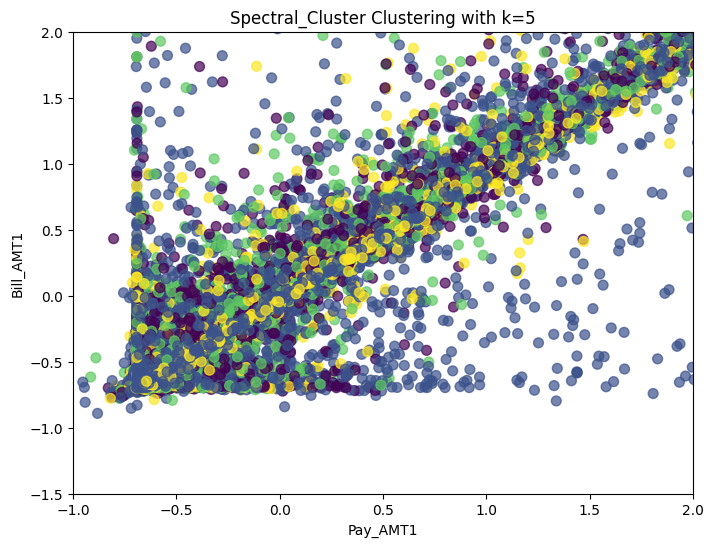

In [28]:
# Visualize the Clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df['Bill_AMT2'], df['Bill_AMT1'], c=df['Spectral_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'Spectral_Cluster Clustering with k={"5"}')
plt.xlabel('Pay_AMT1')
plt.ylabel('Bill_AMT1')
plt.xlim(-1,2)
plt.ylim(-1.5,2)
plt.show()

# K-Medoids clustering

In [19]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.3 MB/s eta 0:00:00


In [20]:
from sklearn_extra.cluster import KMedoids

In [21]:
# Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=5, random_state=42)
labelsk = kmedoids.fit_predict(X)

In [22]:
print(labelsk)

[2 2 2 ... 2 3 3]


In [23]:
df["Kmedoids_Cluster"]=labelsk

In [24]:
df["Kmedoids_Cluster"].value_counts()

,count
Kmedoids_Cluster,
0,8130
2,8092
3,6549
4,4359
1,2802


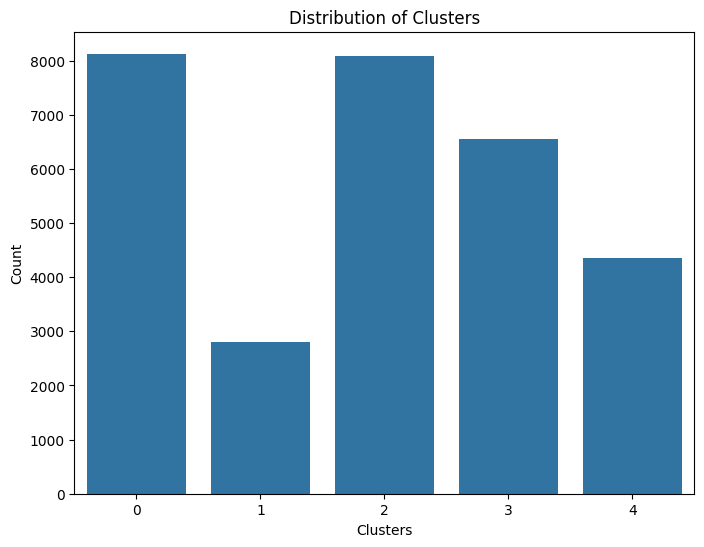

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Kmedoids_Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.show()

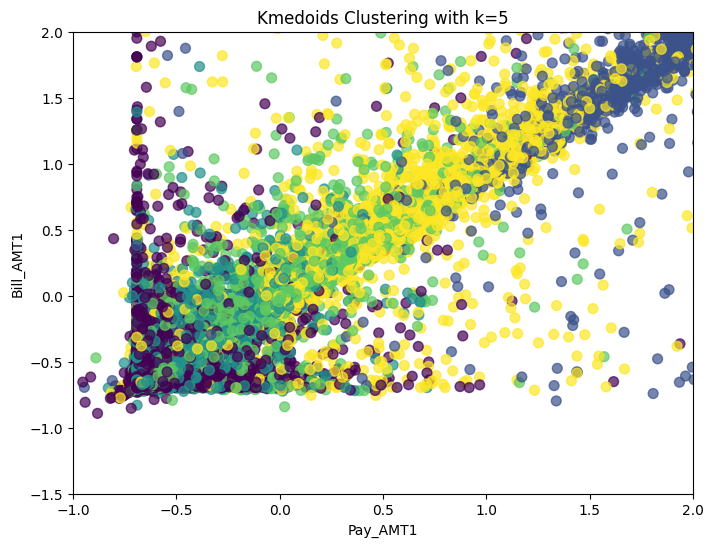

In [25]:
# Visualize the Clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(df['Bill_AMT2'], df['Bill_AMT1'], c=df['Kmedoids_Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title(f'Kmedoids Clustering with k={"5"}')
plt.xlabel('Pay_AMT1')
plt.ylabel('Bill_AMT1')
plt.xlim(-1,2)
plt.ylim(-1.5,2)
plt.show()

In [29]:
df.to_csv('client_with_clusters.csv', index=False)